In [363]:
from polarutilities import*
from IPython.display import Math, Latex

In [364]:

phi_polar = r**3*sym.Function('f')(theta)
phi_polar

r**3*f(theta)

In [365]:
sym.dsolve(polarbiharmonic(phi_polar)).simplify().expand()

Eq(f(theta), C1*exp(-3*I*theta) + C2*exp(-I*theta) + C3*exp(I*theta) + C4*exp(3*I*theta))

In [366]:
A, B, C, D ,x,y, rho,rhow,g , h , alpha,E = sym.symbols('A, B, C, D,x,y,rho,rho_w,g ,h , alpha,E')
fnew = A*sym.cos(3*theta) + B*sym.sin(3*theta) + C*sym.cos(theta) + D*sym.sin(theta)
display(Math(r'f(\theta) = {}'.format(sym.latex(fnew))))


<IPython.core.display.Math object>

In [367]:
##phi_Polar=r**3*fnew
##display(Math(r'\phi = {}'.format(sym.latex(phi_polar))))

In [368]:
phi_polarr=r**3*(A*sym.cos(theta)**3 + B*sym.sin(theta)**3 + C*sym.cos(theta) + D*sym.sin(theta))
display(Math(r'\phi{{(r,\theta)}} = {}'.format(sym.latex(phi_polarr))))

<IPython.core.display.Math object>

.



Converting airy stress function from $polar$ to $cartesian$ co-rdinate system


.

In [369]:
phi_cart=phi_polar.subs([(r,((x**2+y**2)**0.5)),(theta,(sym.atan(y/x)))])
phi_cart

(x**2 + y**2)**1.5*f(atan(y/x))

In [370]:
phi= A*x**3 + B*y**3 + C*x**2*y  + D*x*y**2
display(Math(r'\phi{{(x,y)}} = {}'.format(sym.latex(phi))))

<IPython.core.display.Math object>

In [371]:
sigma_xx1 = sym.diff(phi,(y,2)).simplify()

sigma_yy1 = sym.diff(phi,(x,2)).simplify()

sigma_xy = -sym.diff(phi,x,y).simplify()

sigma_xx = sigma_xx1 - rho*g*x 
sigma_yy = sigma_yy1 - rho*g*x 

display(Math(r'\sigma_{{xx}} = {}'.format(sym.latex(sigma_xx))))
display(Math(r'\sigma_{{yy}} = {}'.format(sym.latex(sigma_yy))))
display(Math(r'\sigma_{{xy}} = {}'.format(sym.latex(sigma_xy))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [372]:
biharm = (sym.diff(phi,(x,4)) + 2*sym.diff(phi,x,x,y,y) + sym.diff(phi,(y,4)))
display(biharm)

0

.

applying $boundary$  $conditions$ at $y=0$

.

In [373]:
lhs = sigma_yy.subs(y,0)

bc_1 = sym.Eq(lhs,-rhow*g*x)
bc_1

Eq(6*A*x - g*rho*x, -g*rho_w*x)

In [374]:
bc1 = sym.Eq(A,(-rhow*g+rho*g)/6)
bc1

Eq(A, g*rho/6 - g*rho_w/6)

In [375]:
lhs = sigma_xy.subs(y,0)
bc_2 = sym.Eq(lhs,0)
bc_2

Eq(-2*C*x, 0)

In [376]:
bc2 = sym.Eq(C,0)
bc2

Eq(C, 0)

In [377]:
t1 = sigma_xx.subs(x,h)
t2 = sigma_xy.subs(x,h)
t3 = sigma_yy.subs(x,h)



.


applying $boundary$  $conditions$ at $x=h$


.

In [378]:
bc_3 = sym.integrate(t1,(y,0,h*sym.tan(alpha)))
bc3 = sym.Eq(bc_3,(-rho*g*sym.tan(alpha)*h**2)/2)

ybar = (y-((h/3)*sym.tan(alpha)))
bc_4 = sym.integrate(t1*(ybar),(y,0,h*sym.tan(alpha)))
bc4  = sym.Eq(bc_4,-(rhow*g*h**3)/6)


bc_5 = sym.integrate(t2,(y,0,h*sym.tan(alpha)))
bc5  = sym.Eq(bc_5,-rhow*g*h**2/2)

display(bc3,bc4,bc5)


Eq(3*B*h**2*tan(alpha)**2 + h*(2*D*h - g*h*rho)*tan(alpha), -g*h**2*rho*tan(alpha)/2)

Eq(2*B*h**3*tan(alpha)**3 + h**2*(-B*h*tan(alpha) + D*h - g*h*rho/2)*tan(alpha)**2 + h*(-2*D*h**2*tan(alpha)/3 + g*h**2*rho*tan(alpha)/3)*tan(alpha), -g*h**3*rho_w/6)

Eq(-2*C*h**2*tan(alpha) - D*h**2*tan(alpha)**2, -g*h**2*rho_w/2)

In [379]:
##soln, = sym.linsolve([bc1,bc3,bc4],[A,B,C,D])
soln, = sym.linsolve([bc1,bc2,bc3,bc5,bc4],[A,B,C,D])

In [380]:
A_soln = soln[0]
B_soln = soln[1]
C_soln = soln[2]
D_soln = soln[3]
##E_soln = soln[4]

display(Math(r'A = {}'.format(sym.latex(A_soln))))
display(Math(r'B =  {}'.format(sym.latex(B_soln))))
display(Math(r'C = {}'.format(sym.latex(C_soln))))
display(Math(r'D = {}'.format(sym.latex(D_soln))))
##display(Math(r'E=  {}'.format(sym.latex(E_soln))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

.



$boundary$  $conditions$ on inclined face


.

In [381]:
t4 = sigma_xx.subs(y,x*sym.tan(alpha)).simplify()
t5 = sigma_xy.subs(y,x*sym.tan(alpha)).simplify()
t6 = sigma_yy.subs(y,x*sym.tan(alpha)).simplify()

bc_6 = t5*sym.cos(alpha) - t4*sym.sin(alpha)
bc6 = sym.Eq(bc_6,0)
bc_7 = t6*sym.cos(alpha) - t5*sym.sin(alpha)
bc7 = sym.Eq(bc_7,0)

display(bc6,bc7)


Eq(-2*x*(C + D*tan(alpha))*cos(alpha) - x*(6*B*tan(alpha) + 2*D - g*rho)*sin(alpha), 0)

Eq(2*x*(C + D*tan(alpha))*sin(alpha) + x*(6*A + 2*C*tan(alpha) - g*rho)*cos(alpha), 0)

.





verifying that all $traction$  $components$ to be $0$ on inclined face


.

In [382]:
t7 = (2*C +2*D*sym.tan(alpha))*sym.cos(alpha)   + (6*B*sym.tan(alpha) +2*D -rho*g)*sym.sin(alpha)
t8 = (2*C +2*D*sym.tan(alpha))*sym.sin(alpha)  +  (6*A  + 2*C*sym.tan(alpha) -rho*g)*sym.cos(alpha)
check1 = t7.subs([(B,B_soln),(C,C_soln),(D,D_soln)]).simplify()
check2 = t8.subs([(A,A_soln),(B,B_soln),(C,C_soln),(D,D_soln)]).simplify()

display(t7,t8,check1,check2)

(2*C + 2*D*tan(alpha))*cos(alpha) + (6*B*tan(alpha) + 2*D - g*rho)*sin(alpha)

(2*C + 2*D*tan(alpha))*sin(alpha) + (6*A + 2*C*tan(alpha) - g*rho)*cos(alpha)

0

0

In [383]:
sigmaxx_soln = sigma_xx.subs([(A,A_soln),(B,B_soln),(C,C_soln),(D,D_soln)]).simplify()
sigmayy_soln = sigma_yy.subs([(A,A_soln),(B,B_soln),(C,C_soln),(D,D_soln)]).simplify()
sigmaxy_soln = sigma_xy.subs([(A,A_soln),(B,B_soln),(C,C_soln),(D,D_soln)]).simplify()
display(Math(r'\sigma_{{xx}} = {}'.format(sym.latex(sigmaxx_soln))))
display(Math(r'\sigma_{{yy}} = {}'.format(sym.latex(sigmayy_soln))))
display(Math(r'\sigma_{{xy}} = {}'.format(sym.latex(sigmaxy_soln))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

.





At $ x=h$ , $ y=0 $ is the point where we get the maximum tensile stress in the structure and at that point shear stress  is 0 $sigma xx $ will be the principle stress
for the min value of alpha for which tensile stress is $0$ is obtained by equating $sigma_{xx}$ to $ 0$



.

 we will prove that maximum tesile stress in the structure occurs at $x$ = $h$ and $y$= $0$  with the help of plotting 3 priciple stresses
 
 we will be considering density of concrete $rho$ =1  , $g$ =$10$ , and couple of $alpha$ values

In [384]:
mu ,P1 ,P2,P3,P4 = sym.symbols('mu,P1,P2,P3,P4')


DEFINING $sigma_{zz} $      

In [385]:
sigmazz_soln = mu*(sigmaxx_soln + sigmayy_soln)



sigmaxx_soln = sigma_xx.subs([(A,A_soln),(B,B_soln),(C,C_soln),(D,D_soln)]).simplify()
sigmayy_soln = sigma_yy.subs([(A,A_soln),(B,B_soln),(C,C_soln),(D,D_soln)]).simplify()
sigmaxy_soln = sigma_xy.subs([(A,A_soln),(B,B_soln),(C,C_soln),(D,D_soln)]).simplify()
display(Math(r'\sigma_{{xx}} = {}'.format(sym.latex(sigmaxx_soln))))
display(Math(r'\sigma_{{yy}} = {}'.format(sym.latex(sigmayy_soln))))
display(Math(r'\sigma_{{xy}} = {}'.format(sym.latex(sigmaxy_soln))))
display(Math(r'\sigma_{{zz}} = {}'.format(sym.latex(sigmazz_soln))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

considering $tan(alpha)$ = $0.1$

In [386]:



sigmaxx_plt1 = sigmaxx_soln.subs([(rho,2.3*rhow),(rhow,1),(g,10),(sym.tan(alpha),.1)])
sigmaxy_plt1 = sigmaxy_soln.subs([(rho,2.3*rhow),(rhow,1),(g,10),(sym.tan(alpha),.1)])
sigmayy_plt1 = sigmayy_soln.subs([(rho,2.3*rhow),(rhow,1),(g,10),(sym.tan(alpha),.1)])
sigmazz_plt1 = sigmazz_soln.subs([(rho,2.3*rhow),(rhow,1),(g,10),(sym.tan(alpha),.1),(mu,.1)])



 


Defining $principle$ $stress$ matrix

In [387]:
pmat1 = sym.Matrix([[(sigmaxx_plt1 -P1) , sigmaxy_plt1 , 0] , [sigmaxy_plt1 , (sigmayy_plt1 - P1) , 0] , [0,0,(sigmazz_plt1 - P1)]])

##tp1 = sym.Matrix([[(sigmaxx_plt -P) , sigmaxy_plt , 0] , [sigmaxy_plt , (sigmayy_plt - P) , 0] , [0,0,(sigmaxy_plt - P)]])

In [388]:
tp2 = sym.det(pmat1)
tp2
tp3 = sym.Eq(tp2,0)
P1 = sym.solve(tp3)
P1

[{P1: 96.7*x - 1977.0*y},
 {P1: 483.5*x - 9885.0*y - 9935.45293381233*sqrt(0.00246716941929514*x**2 - 0.0988367566757139*x*y + y**2)},
 {P1: 483.5*x - 9885.0*y + 9935.45293381233*sqrt(0.00246716941929514*x**2 - 0.0988367566757139*x*y + y**2)}]

In [389]:
PR1_1= 483.5*x -9885*y - 9935.45293381233*((0.00246716941929514*x**2 - 0.0988367566757139*x*y + y**2))**0.5

PR2_1= 48.35*x - 9885.0*y + 9935.45293381233*(0.00246716941929514*x**2 - 0.0988367566757139*x*y + y**2)**0.5

PR3_1 = 96.7*x - 1977*y

display(Math(r'PR{{1_1}} = {}'.format(sym.latex(PR1_1))))
display(Math(r'PR{{2_1}} = {}'.format(sym.latex(PR2_1))))
display(Math(r'PR{{3_1}} = {}'.format(sym.latex(PR3_1))))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

.


Plot of $PR2_1$

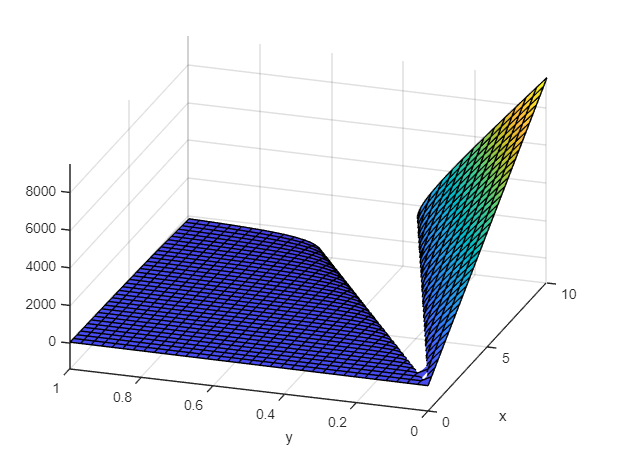

principle stress equations for $tan(alpha)$ =$0.2$

In [390]:
sigmaxx_plt2 = sigmaxx_soln.subs([(rho,2.3*rhow),(rhow,1),(g,10),(sym.tan(alpha),.2)])
sigmaxy_plt2 = sigmaxy_soln.subs([(rho,2.3*rhow),(rhow,1),(g,10),(sym.tan(alpha),.2)])
sigmayy_plt2 = sigmayy_soln.subs([(rho,2.3*rhow),(rhow,1),(g,10),(sym.tan(alpha),.2)])
sigmazz_plt2 = sigmazz_soln.subs([(rho,2.3*rhow),(rhow,1),(g,10),(sym.tan(alpha),.2),(mu,.1)])

P2,P3,P4 = sym.symbols('P2,P3,P4')

In [391]:
pmat2 = sym.Matrix([[(sigmaxx_plt2 -P2) , sigmaxy_plt2 , 0] , [sigmaxy_plt2 , (sigmayy_plt2 - P2) , 0] , [0,0,(sigmazz_plt2 - P2)]])

In [392]:
tp4 = sym.det(pmat2)

tp5 = sym.Eq(tp4,0)
P2 = sym.solve(tp5)
P2

[{P2: 21.7*x - 238.5*y},
 {P2: 108.5*x - 1192.5*y - 1218.42367426113*sqrt(0.00945888712536153*x**2 - 0.190375069991454*x*y + y**2)},
 {P2: 108.5*x - 1192.5*y + 1218.42367426113*sqrt(0.00945888712536153*x**2 - 0.190375069991454*x*y + y**2)}]

In [393]:
PR1_2= 108.5*x -1192.5*y - 1218.42367426113*((0.00945888712536153*x**2 - 0.190375069991454*x*y + y**2))**0.5

PR2_2= 48.35*x - 1192.5*y + 1218.42367426113*(0.00945888712536153*x**2 - 0.190375069991454*x*y + y**2)**0.5

PR3_2 = 96.7*x - 1977*y

display(Math(r'PR{{1_2}} = {}'.format(sym.latex(PR1_2))))
display(Math(r'PR{{2_2}} = {}'.format(sym.latex(PR2_2))))
display(Math(r'PR{{3_2}} = {}'.format(sym.latex(PR3_2))))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Plot of $PR2_2$

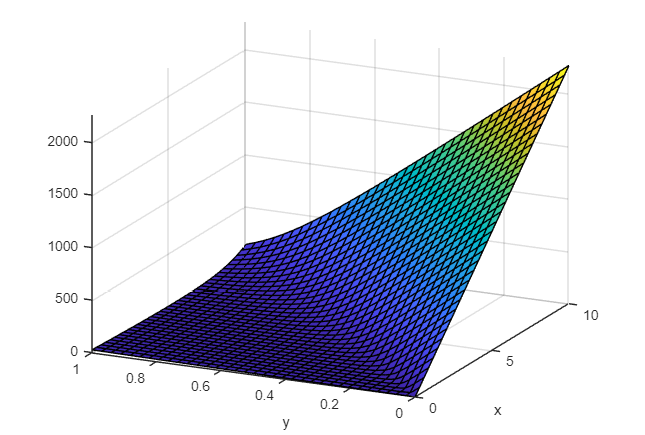

principle stress equations for $tan(alpha)$ =$0.4$

In [394]:
sigmaxx_plt3 = sigmaxx_soln.subs([(rho,2.3*rhow),(rhow,1),(g,10),(sym.tan(alpha),.4)])
sigmaxy_plt3 = sigmaxy_soln.subs([(rho,2.3*rhow),(rhow,1),(g,10),(sym.tan(alpha),.4)])
sigmayy_plt3 = sigmayy_soln.subs([(rho,2.3*rhow),(rhow,1),(g,10),(sym.tan(alpha),.4)])
sigmazz_plt3 = sigmazz_soln.subs([(rho,2.3*rhow),(rhow,1),(g,10),(sym.tan(alpha),.4),(mu,.1)])



In [395]:
pmat3 = sym.Matrix([[(sigmaxx_plt3 -P3) , sigmaxy_plt3 , 0] , [sigmaxy_plt3 , (sigmayy_plt3 - P3) , 0] , [0,0,(sigmazz_plt3 - P3)]])

In [396]:
tp6 = sym.det(pmat3)

tp7 = sym.Eq(tp6,0)
P3 = sym.solve(tp7)
P3

[{P3: 2.95*x - 25.5*y},
 {P3: 14.75*x - 127.5*y - 141.994718211629*sqrt(0.0303812771233726*x**2 - 0.313019218846869*x*y + y**2)},
 {P3: 14.75*x - 127.5*y + 141.994718211629*sqrt(0.0303812771233726*x**2 - 0.313019218846869*x*y + y**2)}]

In [397]:
PR1_3= 14.75*x -127.5*y - 141.9947182116293*((0.0303812771233726*x**2 - 0.313019218846869*x*y + y**2))**0.5

PR2_3= 14.75*x -127.5*y  + 141.9947182116293*((0.0303812771233726*x**2 - 0.313019218846869*x*y + y**2))**0.5

PR3_3 = 2.95*x - 25.5*y

display(Math(r'PR{{1_3}} = {}'.format(sym.latex(PR1_3))))
display(Math(r'PR{{2_3}} = {}'.format(sym.latex(PR2_3))))
display(Math(r'PR{{3_3}} = {}'.format(sym.latex(PR3_3))))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

.



Plot of $PR2_3$

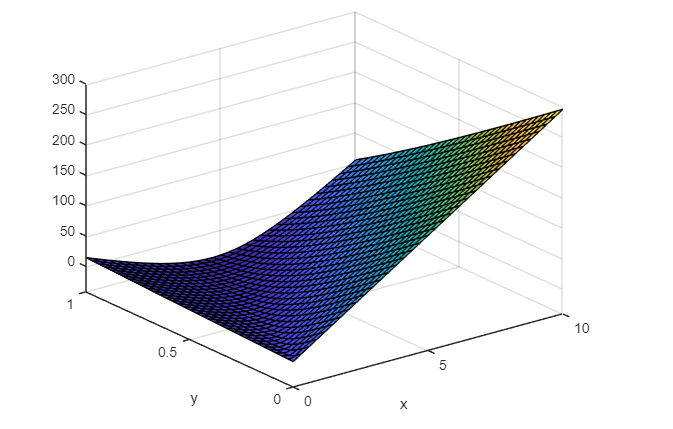

principle stress equations for $tan(alpha)$ =$0.5$

In [398]:
sigmaxx_plt4 = sigmaxx_soln.subs([(rho,2.3*rhow),(rhow,1),(g,10),(sym.tan(alpha),.5)])
sigmaxy_plt4 = sigmaxy_soln.subs([(rho,2.3*rhow),(rhow,1),(g,10),(sym.tan(alpha),.5)])
sigmayy_plt4 = sigmayy_soln.subs([(rho,2.3*rhow),(rhow,1),(g,10),(sym.tan(alpha),.5)])
sigmazz_plt4 = sigmazz_soln.subs([(rho,2.3*rhow),(rhow,1),(g,10),(sym.tan(alpha),.5),(mu,.1)])



In [399]:
pmat4 = sym.Matrix([[(sigmaxx_plt4 -P4) , sigmaxy_plt4 , 0] , [sigmaxy_plt4 , (sigmayy_plt4 - P4) , 0] , [0,0,(sigmazz_plt4 - P4)]])

In [400]:
tp8 = sym.det(pmat4)

tp9 = sym.Eq(tp8,0)
P4 = sym.solve(tp9)
P4

[{P4: 0.7*x - 11.4*y},
 {P4: 3.5*x - 57.0*y - 69.6347614342147*sqrt(0.0375850690864096*x**2 - 0.317385027840792*x*y + y**2)},
 {P4: 3.5*x - 57.0*y + 69.6347614342147*sqrt(0.0375850690864096*x**2 - 0.317385027840792*x*y + y**2)}]

In [401]:
PR1_4= 3.5*x -57.0*y - 69.6347614342147*((0.0375850690864096*x**2 - 0.317385027840792*x*y + y**2))**0.5

PR2_4= 3.5*x -57.0*y + 69.6347614342147*((0.0375850690864096*x**2 - 0.317385027840792*x*y + y**2))**0.5

PR3_4 = 0.7*x - 11.4*y

display(Math(r'PR{{1_4}} = {}'.format(sym.latex(PR1_4))))
display(Math(r'PR{{2_4}} = {}'.format(sym.latex(PR2_4))))
display(Math(r'PR{{3_4}} = {}'.format(sym.latex(PR3_4))))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

_





PLOT of $PR2_4$

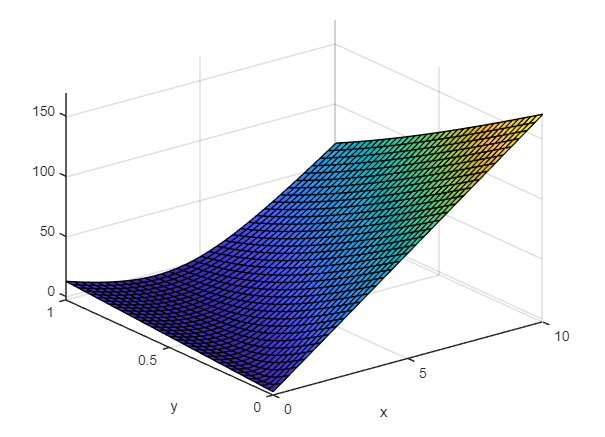

$SCRAP$ $OUT$ FROM THIS CELL

In [402]:
from mpl_toolkits import mplot3d


In [288]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


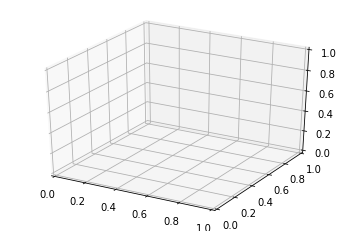

In [289]:
fig = plt.figure()
ax = plt.axes(projection ='3d')

In [290]:
def f(x,y):
    return P1


x = np.linspace(0 ,10,30)
y = np.linspace(0 ,1,30)

X,Y = np.meshgrid(x,y)
Z = f(x,y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


NameError: name 'P1' is not defined

In [ ]:
sigma_pr = sigma_xx.subs([(x,h),(y,0),(D,D_soln),(g,9.81),(rho,2.3*rhow)])
display(Math(r'\sigma_{{pr}} = {}'.format(sym.latex(sigma_pr))))



In [ ]:
t9 = sym.Eq(sigma_pr.subs([(D,D_soln),(g,9.81),(rho,2.3*rhow)]),0)
t9

In [ ]:
t10= sigma_pr.coeff(h*rhow)
t11 = sym.Eq(t10,0)
t11

In [ ]:
from sympy.solvers import solve

In [ ]:
sol = solve(t11,alpha)

In [ ]:
alphadeg = (sol[1]*180/sym.pi).evalf()
display(alphadeg)